<h1><center>RFM</center></h1>

Import library

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os


Import data

In [2]:
path = 'D:\Giáo Trình\Kỳ 5\Kho và Khai Phá Dữ Liệu\Project'
df = pd.read_csv(os.path.join(path, 'Data\\Processed Data\\order_data.csv'))
df.head(5)

,order_id,order_item_id,customer_unique_id,product_id,seller_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,871766c5855e863f6eccc05f988b23cb,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,eb28e67c4c0b83846050ddfb8a35d051,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,3818d81c6709e39d06b2738a8d3a2474,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,af861d436cfc08b2c2ddefd0ba074622,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,64b576fb70d441e8f1b2d7d446e483c5,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,199.90,18.14,218.04


RFM : Recency

In [3]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'],format='%Y/%m/%d %H:%M')
df['Diff'] = max(df['order_purchase_timestamp']) - df['order_purchase_timestamp']
recency = df.groupby('customer_unique_id')['Diff'].min().reset_index()
recency['Diff'] = recency['Diff'].dt.days
recency.head()


,customer_unique_id,Diff
0,0000366f3b9a7992bf8c76cfdf3221e2,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118
2,0000f46a3911fa3c0805444483337064,541
3,0000f6ccb0745a6a4b88665a16c9f078,325
4,0004aac84e0df4da2b147fca70cf8255,292


In [4]:
recency.columns = ['Customer Id', 'Recency']
recency.head()

,Customer Id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118
2,0000f46a3911fa3c0805444483337064,541
3,0000f6ccb0745a6a4b88665a16c9f078,325
4,0004aac84e0df4da2b147fca70cf8255,292


RFM : Frequency

In [5]:
frequency = df.groupby('customer_unique_id')['order_id'].count().reset_index()
frequency.columns = ['Customer Id', 'Frequency']
frequency.head()

,Customer Id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


RFM : Monetary

In [6]:
monetary = df.groupby('customer_unique_id')['payment_value'].sum().reset_index()
monetary.columns = ['Customer Id', 'Monetary']
monetary.head()

,Customer Id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


RFM

In [7]:
rfm_temp = pd.merge(recency, frequency, on = 'Customer Id', how = 'inner')
rfm = pd.merge(rfm_temp, monetary, how = 'inner', on = 'Customer Id')
rfm

,Customer Id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
2,0000f46a3911fa3c0805444483337064,541,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,2,4134.84
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.58
95417,ffff371b4d645b6ecea244b27531430a,572,1,112.46
95418,ffff5962728ec6157033ef9805bacc48,123,1,133.69


Standalization

In [8]:
scaler = StandardScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm.head()
rfm = rfm[rfm['Customer Id'] != '0a0a92112bd4c708ca5fde585afaa872']

Use Elbow method to choose the most suitable K 

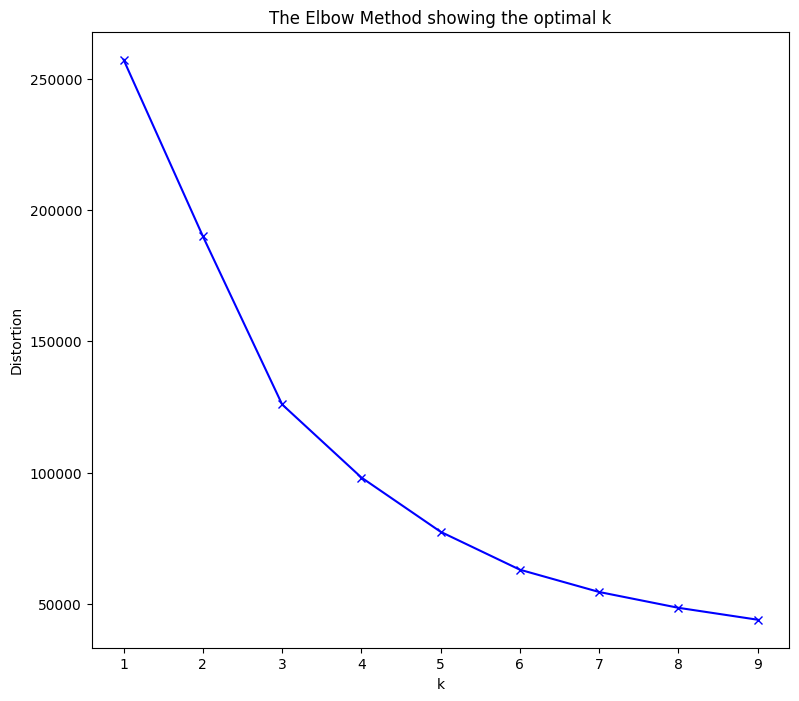

In [10]:
distortions = []
for k in range(1, 10):
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(rfm[['Recency', 'Frequency', 'Monetary']])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(9,8))
plt.plot(range(1, 10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Choose K = 4

In [11]:
rfm_model = rfm[['Recency', 'Frequency', 'Monetary']].values
clust = 4
model = KMeans(n_clusters = clust, random_state = 0).fit(rfm_model)
pred_label = model.predict(rfm_model)
rfm['Cluster Id'] = pred_label

C:\Users\quoct\AppData\Local\Temp\ipykernel_7792\1514431088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Cluster Id'] = pred_label


In [12]:
from sklearn.metrics import silhouette_score
score = silhouette_score(rfm_model, pred_label, metric = 'euclidean')
score 

0.4783688056544022

In [13]:
from sklearn.metrics import calinski_harabasz_score
score1 = calinski_harabasz_score(rfm_model, pred_label)
score1

51540.09423536276

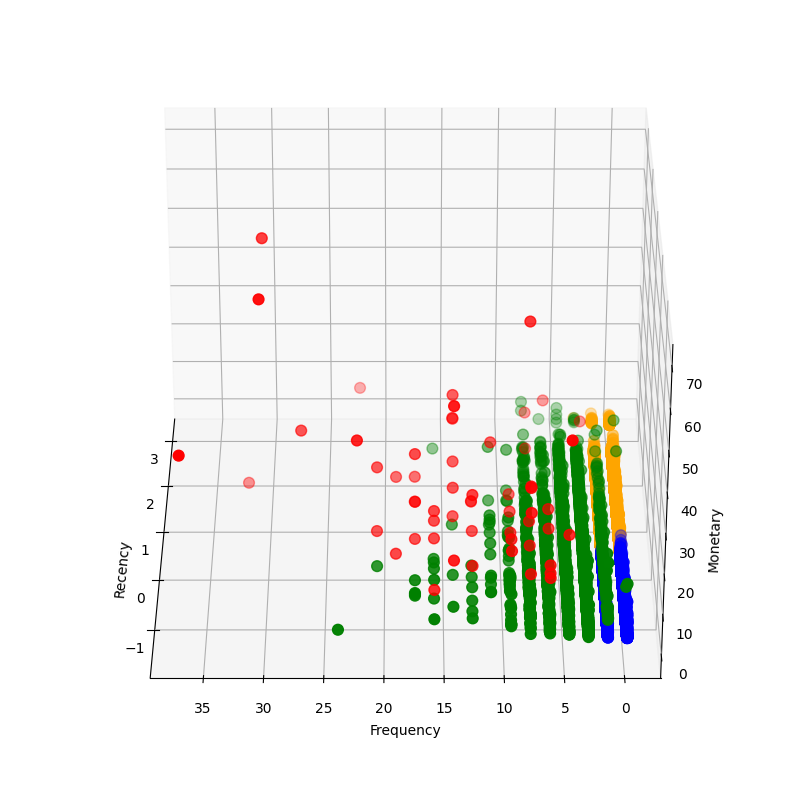

In [14]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
colorList = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']
for i in range(clust) : 
  ax.scatter3D(rfm_model[pred_label == i, 0], rfm_model[pred_label == i, 1], rfm_model[pred_label == i, 2], c = colorList[i], s = 60)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.view_init(30, 180)
plt.show()

Recency

<AxesSubplot: xlabel='Cluster Id', ylabel='Recency'>

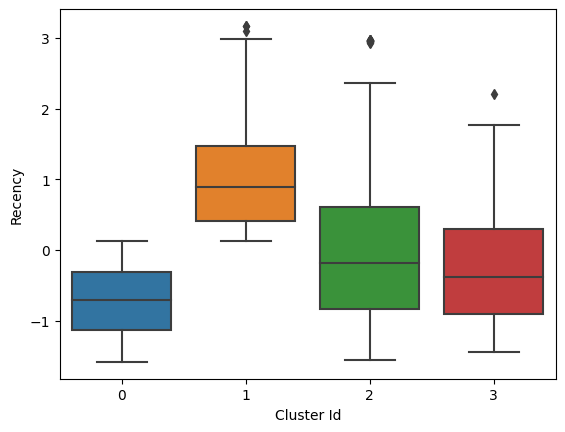

In [15]:
sns.boxplot(x = 'Cluster Id', y = 'Recency', data = rfm)

Frequency

<AxesSubplot: xlabel='Cluster Id', ylabel='Frequency'>

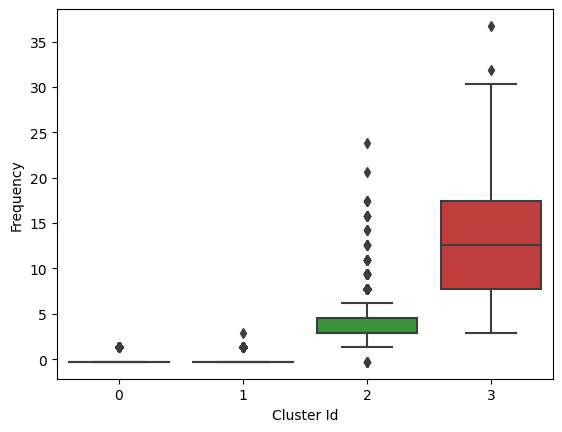

In [16]:
sns.boxplot(x = 'Cluster Id', y = 'Frequency', data = rfm)

Monetary

<AxesSubplot: xlabel='Cluster Id', ylabel='Monetary'>

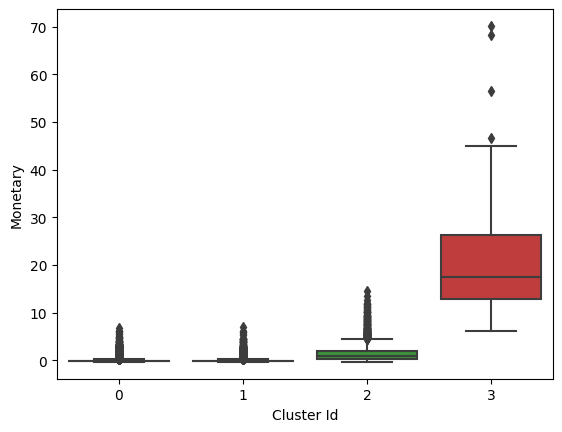

In [17]:
sns.boxplot(x = 'Cluster Id', y = 'Monetary', data = rfm)

In [18]:
rfm['Cluster Name'] = rfm['Cluster Id'].map({0: 'Potential', 1: 'Lost', 2: 'Loyal customers', 3: 'Champions'})
rfm

C:\Users\quoct\AppData\Local\Temp\ipykernel_7792\380420361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Cluster Name'] = rfm['Cluster Id'].map({0: 'Potential', 1: 'Lost', 2: 'Loyal customers', 3: 'Champions'})


,Customer Id,Recency,Frequency,Monetary,Cluster Id,Cluster Name
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.833121,-0.290564,-0.110523,0,Potential
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.813533,-0.290564,-0.289267,0,Potential
2,0000f46a3911fa3c0805444483337064,1.948293,-0.290564,-0.197285,1,Lost
3,0000f6ccb0745a6a4b88665a16c9f078,0.537999,-0.290564,-0.263665,1,Lost
4,0004aac84e0df4da2b147fca70cf8255,0.322537,-0.290564,-0.024836,1,Lost
...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,1.360670,1.318585,6.111367,2,Loyal customers
95416,fffea47cd6d3cc0a88bd621562a9d061,0.152779,-0.290564,-0.199840,1,Lost
95417,ffff371b4d645b6ecea244b27531430a,2.150696,-0.290564,-0.156397,1,Lost
95418,ffff5962728ec6157033ef9805bacc48,-0.780888,-0.290564,-0.123316,0,Potential


In [19]:
rfm.to_csv(path + "\Web App\\Data\\rfm.csv", index = False)

**What does each cluster represent?**

* **Cluster 0** : This cluster can be interpreted as (Potential) as their spending is the smallest among all clusters but have the lowest recency. This cluster is quite huge. So, some marketing effort could be advisable towards it in order to increase its monetary value.

* **Cluster 1** : (Lost) is the name we can give to this cluster. Customers in this cluster seem have one of the highest recency and their monetary value is low. This cluster shouldn't be the focus of marketing effort.

* **Cluster 2** : can be considered as our best one (Loyal customers) since although customers in this cluster haven't on avergae ordered in a while, their frequency of orders is greater than all other clusters and the value of their orders is quite high.

* **Cluster 3** : This is our second best (Champions) cluster as it's recency comes second and the average amount spent is largest. This cluster is also second in terms of number of customers.